Shape of X_train : (1168, 11)
Shape of Y_train : (1168, 1)
Shape of X_test : (292, 11)
Shape of Y_test : (292, 1)
Cost is : 19608941954.06892
Cost is : 1265970426.032749
Cost is : 1185081558.1090434
Cost is : 1157079761.9520137
Cost is : 1139041599.3859987
Cost is : 1126008205.454589
Cost is : 1116396133.6167321
Cost is : 1109267958.7906728
Cost is : 1103970031.749363
Cost is : 1100026955.1704476


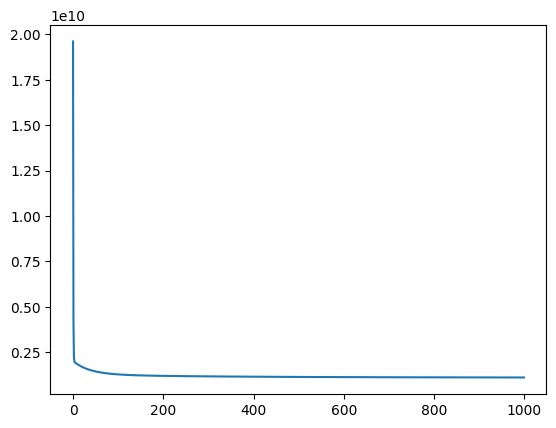

error  0.18777733348994632
Test error is : 18.777733348994634 %
Test Accuracy is : 81.22226665100537 %


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()

train_data = train.values
Y = train_data[:, -1].reshape(train_data.shape[0], 1)
X = train_data[:, :-1]

# print("X ", X)
# print("y ", Y)


test_data = test.values
Y_test = test_data[:, -1].reshape(test_data.shape[0], 1)
X_test = test_data[:, :-1]

X = np.vstack((np.ones((X.shape[0],)), X.T)).T
X_test = np.vstack((np.ones((X_test.shape[0],)), X_test.T)).T

print("Shape of X_train :", X.shape)
print("Shape of Y_train :", Y.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of Y_test :", Y_test.shape)


def model(X, Y, learning_rate, iteration):
    m = Y.size
    theta = np.zeros((X.shape[1], 1))
    cost_list = []

    for i in range(iteration):
        y_pred = np.dot(X, theta)

        cost = (1 / (2 * m)) * np.sum(np.square(y_pred - Y))

        d_theta = (1 / m) * np.dot(X.T, y_pred - Y)

        theta = theta - learning_rate * d_theta

        cost_list.append(cost)

        if (i % (iteration / 10) == 0):
            print("Cost is :", cost)

    return theta, cost_list


iteration = 1000
learning_rate = 0.00000005

theta, cost_list = model(X, Y, learning_rate=learning_rate, iteration=iteration)

rng = np.arange(0, iteration)
plt.plot(rng, cost_list)
plt.show()

y_pred = np.dot(X_test, theta)

# Mean Absolute Percentage Error
error = (1 / X_test.shape[0]) * np.sum(np.abs((y_pred - Y_test) / Y_test))

print("error ", error)

print("Test error is :", error * 100, "%")
print("Test Accuracy is :", (1 - error) * 100, "%")
